# I. Q-Learning - Table approach

In [0]:
import random
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import gym

from collections import deque
from time import time

In [0]:
seed = 2205
random.seed(seed)

print('Seed: {}'.format(seed))

Seed: 2205


##Game Design

There exists a board with 4 cells. The Q-agent will receive a +1 reward every time it fills a vacant cell, and will receive a -1 penalty when it tries to fill an already filled cell.

The game ends when the board is full.



In [0]:
class Game:
  
  board = None
  board_size = 0
  
  def __init__(self, board_size = 4):
    self.board_size = board_size
    self.reset()
    
  def reset(self):
    self.board = np.zeros(self.board_size)
    
  def play(self, cell):
    ## Returns a tuple: (reward, game_over?)
    if self.board[cell] == 0:
      self.board[cell] = 1
      game_over = len(np.where(self.board == 0)[0]) == 0
      return (1, game_over)
    else:
      return (-1, False)

In [0]:
def state_to_str(state):
  return str(list(map(int, state.tolist())))

all_states = list()
for i in range(2):
  for j in range(2):
    for k in range(2):
      for l in range(2):
        s = np.array([i, j, k, l])
        all_states.append(state_to_str(s))

print('All possible states are: ')
for s in all_states:
  print(s)

All possible states are: 
[0, 0, 0, 0]
[0, 0, 0, 1]
[0, 0, 1, 0]
[0, 0, 1, 1]
[0, 1, 0, 0]
[0, 1, 0, 1]
[0, 1, 1, 0]
[0, 1, 1, 1]
[1, 0, 0, 0]
[1, 0, 0, 1]
[1, 0, 1, 0]
[1, 0, 1, 1]
[1, 1, 0, 0]
[1, 1, 0, 1]
[1, 1, 1, 0]
[1, 1, 1, 1]


Initializing the game:

In [0]:
game = Game()

## Q-Learning

In [0]:
num_of_games = 2000
epsilon = 0.1
gamma = 1

Initializing the Q-Table:

In [0]:
q_table = pd.DataFrame(0, 
                       index = np.arange(4),
                       columns = all_states)

Letting the agent play and learn:

In [0]:
r_list = [] ##Stores the total reward of each game so we can plot it later

for g in range(num_of_games):
  game_over = False
  game.reset()
  total_reward = 0
  
  while not game_over:
    state = np.copy(game.board)
    if random.random() < epsilon:
      action = random.randint(0, 3)
    else:
      action = q_table[state_to_str(state)].idxmax()
    
    reward, game_over = game.play(action)
    total_reward += reward
    if np.sum(game.board) == 4:  ##Terminal state
      next_state_max_q_value = 0
    else:
      next_state = np.copy(game.board)
      next_state_max_q_value = q_table[state_to_str(next_state)].max()
    q_table.loc[action, state_to_str(state)] = reward + gamma * next_state_max_q_value
  r_list.append(total_reward)
q_table

,"[0, 0, 0, 0]","[0, 0, 0, 1]","[0, 0, 1, 0]","[0, 0, 1, 1]","[0, 1, 0, 0]","[0, 1, 0, 1]","[0, 1, 1, 0]","[0, 1, 1, 1]","[1, 0, 0, 0]","[1, 0, 0, 1]","[1, 0, 1, 0]","[1, 0, 1, 1]","[1, 1, 0, 0]","[1, 1, 0, 1]","[1, 1, 1, 0]","[1, 1, 1, 1]"
0,4,3,3,2,3,0,2,0,2,-1,1,-1,1,0,0,0
1,4,0,3,0,2,0,0,0,3,2,2,1,1,0,0,0
2,4,3,2,0,0,0,0,0,3,2,1,0,2,1,0,0
3,4,0,2,0,0,0,0,0,3,1,2,0,2,0,1,0


Let's verify that the agent indeed learnt a correct strategy by seeing what action it will choose in each one of the possible states

In [0]:
for i in range(2):
  for j in range(2):
    for k in range(2):
      for l in range(2):
        b = np.array([i, j, k, l])
        if len(np.where(b == 0)[0]) != 0:
          action = q_table[state_to_str(b)].idxmax()
          pred = q_table[state_to_str(b)].tolist()
          print('Board: {b}\tPredicted Q-values: {p}\tBest action: {a}\tCorrect action? {s}'
               .format(b = b, p = pred, a = action, s = b[action]==0))

Board: [0 0 0 0]	Predicted Q-values: [4, 4, 4, 4]	Best action: 0	Correct action? True
Board: [0 0 0 1]	Predicted Q-values: [3, 0, 3, 0]	Best action: 0	Correct action? True
Board: [0 0 1 0]	Predicted Q-values: [3, 3, 2, 2]	Best action: 0	Correct action? True
Board: [0 0 1 1]	Predicted Q-values: [2, 0, 0, 0]	Best action: 0	Correct action? True
Board: [0 1 0 0]	Predicted Q-values: [3, 2, 0, 0]	Best action: 0	Correct action? True
Board: [0 1 0 1]	Predicted Q-values: [0, 0, 0, 0]	Best action: 0	Correct action? True
Board: [0 1 1 0]	Predicted Q-values: [2, 0, 0, 0]	Best action: 0	Correct action? True
Board: [0 1 1 1]	Predicted Q-values: [0, 0, 0, 0]	Best action: 0	Correct action? True
Board: [1 0 0 0]	Predicted Q-values: [2, 3, 3, 3]	Best action: 1	Correct action? True
Board: [1 0 0 1]	Predicted Q-values: [-1, 2, 2, 1]	Best action: 1	Correct action? True
Board: [1 0 1 0]	Predicted Q-values: [1, 2, 1, 2]	Best action: 1	Correct action? True
Board: [1 0 1 1]	Predicted Q-values: [-1, 1, 0, 0]	Be

We can improve the performance of our algorithm by increasing the <math xmlns="http://www.w3.org/1998/Math/MathML"><mi>&#x3B5;</mi></math> (epsilon) value (which controls how much the algorithm can explore), or by letting the agent play more games.

Let's plot the total reward the agent received per game:

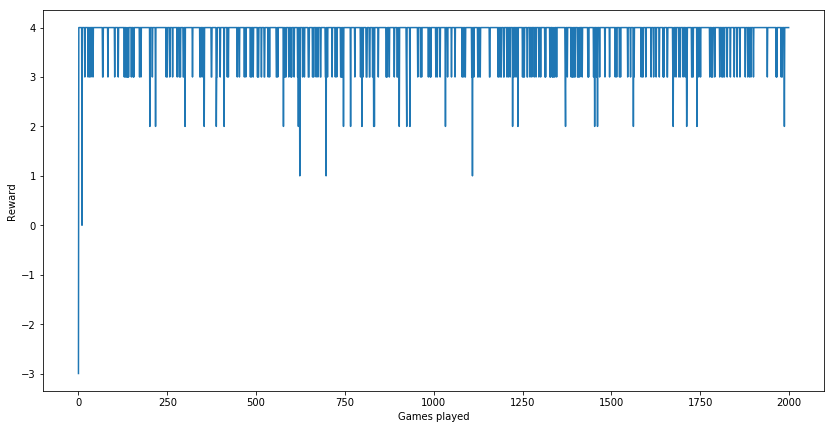

In [0]:
plt.figure(figsize = (14, 7))
plt.plot(range(len(r_list)), r_list)
plt.xlabel('Games played')
plt.ylabel('Reward')
plt.show()